In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns

In [9]:
df = pd.read_csv("Country-Income-and-Education-Level.csv")

income_mapping = {
    'Low income': 1,
    'Lower middle income': 2,
    'Upper middle income': 3,
    'High income': 4,
}

df['income_numeric'] = df['Income'].map(income_mapping)
df = df.dropna(subset=['Education Index', 'income_numeric'])
correlation, p_value = pearsonr(df['Education Index'], df['income_numeric'])
print(f'Correlation between education level and income: {correlation}')
print(f'P-value: {p_value}')

Correlation between education level and income: 0.866086742295622
P-value: 2.8014433002608787e-54


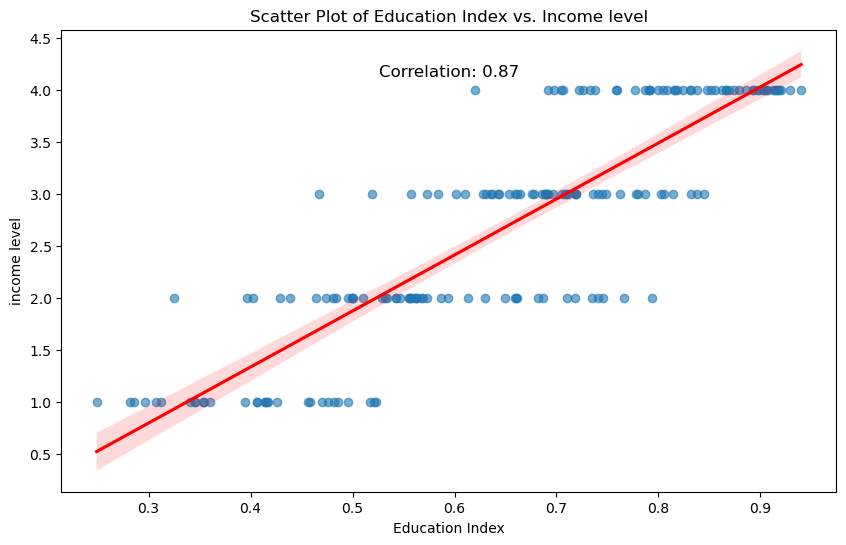

In [12]:
x = df['Education Index']
y = df['income_numeric']

plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.xlabel('Education Index')
plt.ylabel('income level')
plt.title('Scatter Plot of Education Index vs. Income level')
plt.text(0.5, 0.9, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, ha='center')
plt.show()

In [16]:
#Data Cleaning
df = pd.read_csv('Table 210-06315_en.csv')
df.columns = df.iloc[0]
df = df[5:]
df.reset_index(drop=True, inplace=True)
df.columns = ['Year', 'Quarter','Educational attainment','Male Income', 'Female Income', 'Average Income' ]
df = df.dropna(subset=['Average Income'])
df

,Year,Quarter,Educational attainment,Male Income,Female Income,Average Income
0,2023,NaN,Primary and below,15000,10200,12000
1,2023,NaN,Secondary,19900,13000,16000
2,2023,NaN,Lower secondary (4),18000,12000,15000
3,2023,NaN,Upper secondary (5),20000,13000,16100
4,2023,NaN,Post-secondary (6),33000,27000,30000
...,...,...,...,...,...,...
75,2024,Q3,Post-secondary - non-degree (7),24000,19400,21000
76,2024,Q3,Post-secondary - diploma/certificate...,23000,18300,20200
77,2024,Q3,Post-secondary - sub-degree (9),25000,20000,21100
78,2024,Q3,Post-secondary - degree (10),40000,33000,36200


In [19]:
#Data Pre-Process
df['Education Level'] = 0

for index,row in df.iterrows():
    df.at[index, 'Educational attainment']  = str(row['Educational attainment']).strip()

education_level_mapping = {
    'Primary and below': 1,
    'Lower secondary (4)': 2,
    'Upper secondary (5)': 3,
    'Post-secondary - non-degree (7)': 4,
    'Post-secondary - degree (10)': 5 }

df['Education Level'] = df['Educational attainment'].map(education_level_mapping).fillna(0).astype(int)
df = df[df['Education Level'] != 0]
df.reset_index(drop=True, inplace=True)
df

,Year,Quarter,Educational attainment,Male Income,Female Income,Average Income,Education Level
0,2023,NaN,Primary and below,15000,10200,12000,1
1,2023,NaN,Lower secondary (4),18000,12000,15000,2
2,2023,NaN,Upper secondary (5),20000,13000,16100,3
3,2023,NaN,Post-secondary - non-degree (7),24000,19000,20500,4
4,2023,NaN,Post-secondary - degree (10),38700,30000,35000,5
5,2023,Q1,Primary and below,15000,10000,12000,1
6,2023,Q1,Lower secondary (4),17500,12000,15000,2
7,2023,Q1,Upper secondary (5),20000,13000,16000,3
8,2023,Q1,Post-secondary - non-degree (7),24200,19200,21000,4
9,2023,Q1,Post-secondary - degree (10),40000,30000,35000,5


In [20]:
m = df[['Education Level', 'Male Income']].corr()
print('The Correlation coefficient between Male Income and Educational attainment is', m['Education Level'][1])

f = df[['Education Level', 'Female Income']].corr()
print('The Correlation coefficient between Female Income and Educational attainment is', f['Education Level'][1])

a = df[['Education Level', 'Average Income']].corr()
print('The Correlation coefficient between Average Income and Educational attainment is', a['Education Level'][1])

The Correlation coefficient between Male Income and Educational attainment is 0.9042613939189457
The Correlation coefficient between Female Income and Educational attainment is 0.9044160750283544
The Correlation coefficient between Average Income and Educational attainment is 0.8991237992511785


In [21]:
def reg(income):
    income = pd.to_numeric(income)
    x = df['Education Level']
    y = income
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    print(model.summary())

reg(df['Average Income'])
reg(df['Male Income'])
reg(df['Female Income'])


                            OLS Regression Results                            
Dep. Variable:         Average Income   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           3.29e-15
Time:                        22:40:08   Log-Likelihood:                -383.72
No. Observations:                  40   AIC:                             771.4
Df Residuals:                      38   BIC:                             774.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4456.2500   1349.831     

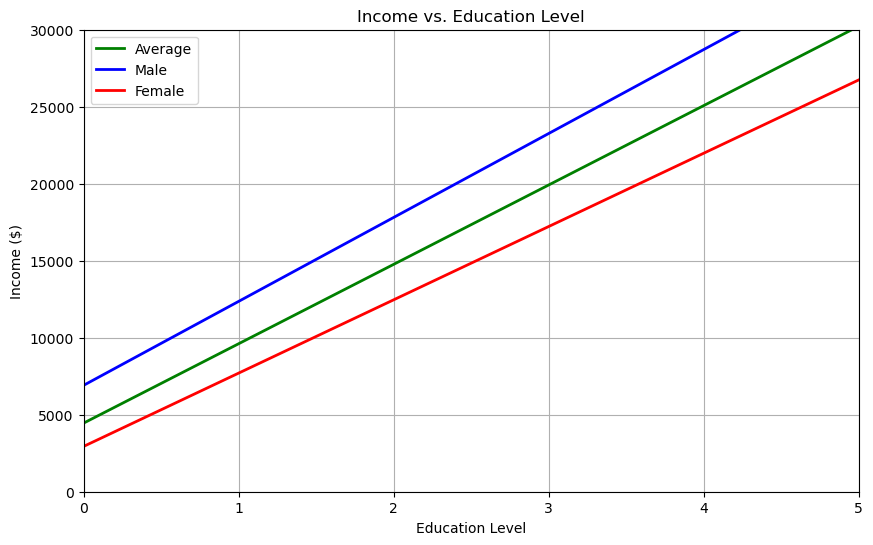

In [31]:
import matplotlib.pyplot as plt

a_intercept = 4456.25
a_slope = 5153.75

m_intercept = 6910
m_slope = 5450

f_intercept = 2943.75
f_slope = 4758.75


# Create a range of education levels for the regression line
education_levels = np.linspace(0, 5, 100)
predicted_income = a_intercept + a_slope * education_levels
predicted_male_income = m_intercept + m_slope * education_levels
predicted_female_income = f_intercept + f_slope * education_levels

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.plot(education_levels, predicted_income, color='green', label='Average', linewidth=2)
plt.plot(education_levels, predicted_male_income, color='blue', label='Male', linewidth=2)
plt.plot(education_levels, predicted_female_income, color='red', label='Female', linewidth=2)

# Labels and Title
plt.title('Income vs. Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income ($)')
plt.xlim(0, 5)
plt.ylim(0, 30000)
plt.grid()
plt.legend()
plt.show()